## Uncovering Suicide Risk: A Data-Driven Look at Age, Race, and Gender

**Author:** Sabriya Sowers  
**Date:** February 16, 2025  

### Purpose  
This project analyzes historical suicide rates in the United States to identify the demographic groups most at risk. It examines trends over time, age groups most affected, differences by sex and race, and any high risk populations.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
file_path = "data/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first 10 rows. The default is 5 rows if ()
print(df.head(10))  # Prints output

# Display the data shape 
print('Dataset Shape', df.shape) # Prints (rows, columns)

# Display the data type
print('Data Types:\n', df.dtypes) # Prints data types of each column

# Inspect first rows of the DataFrame
print('First 5 rows:\n', df.head()) # Ensures output is visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB
                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-a

Suicide Rate Trends Over Time: Highlighting Peak & Lowest Suicide Rates

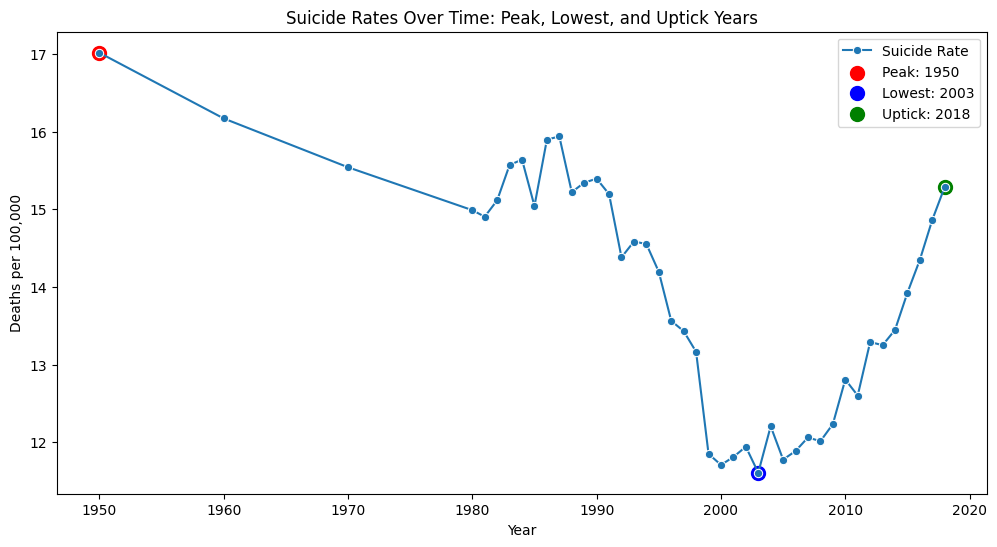

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data to get the average suicide rate per year
df_yearly = df.groupby('YEAR', as_index=False)['ESTIMATE'].mean()

# Find the highest and lowest suicide rate years
max_year = df_yearly.loc[df_yearly['ESTIMATE'].idxmax()]
min_year = df_yearly.loc[df_yearly['ESTIMATE'].idxmin()]

# Identify the uptick year after 2003 (sharp increase)
uptick_year = df_yearly[df_yearly['YEAR'] >= 2003].sort_values(by='ESTIMATE', ascending=False).iloc[0]

# Convert peak, lowest, and uptick years to integers
max_year_year = int(max_year['YEAR'])
min_year_year = int(min_year['YEAR'])
uptick_year_year = int(uptick_year['YEAR'])

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x='YEAR', y='ESTIMATE', marker='o', label="Suicide Rate")

# Highlight peak, lowest, and uptick points
plt.scatter(max_year_year, max_year['ESTIMATE'], color='red', s=100, label=f"Peak: {max_year_year}")
plt.scatter(min_year_year, min_year['ESTIMATE'], color='blue', s=100, label=f"Lowest: {min_year_year}")
plt.scatter(uptick_year_year, uptick_year['ESTIMATE'], color='green', s=100, label=f"Uptick: {uptick_year_year}")

# Labels & title
plt.title('Suicide Rates Over Time: Peak, Lowest, and Uptick Years')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000')
plt.legend()
plt.show()

Insights: The 1950s' high suicide rate likely resulted from a combination of war-related trauma (aging post World War I & II and Korean War vets), societal pressures, economic changes, Cold War anxieties, higher substance abuse rates and a lack of mental health support. The lower rates in 2003 could be attributed to mental health advancements, economic recovery, lower substance abuse rates, and increased awareness efforts.

Suicide Rate Trends By Age Group: Highlighting Peak & Lowest Suicide Rates

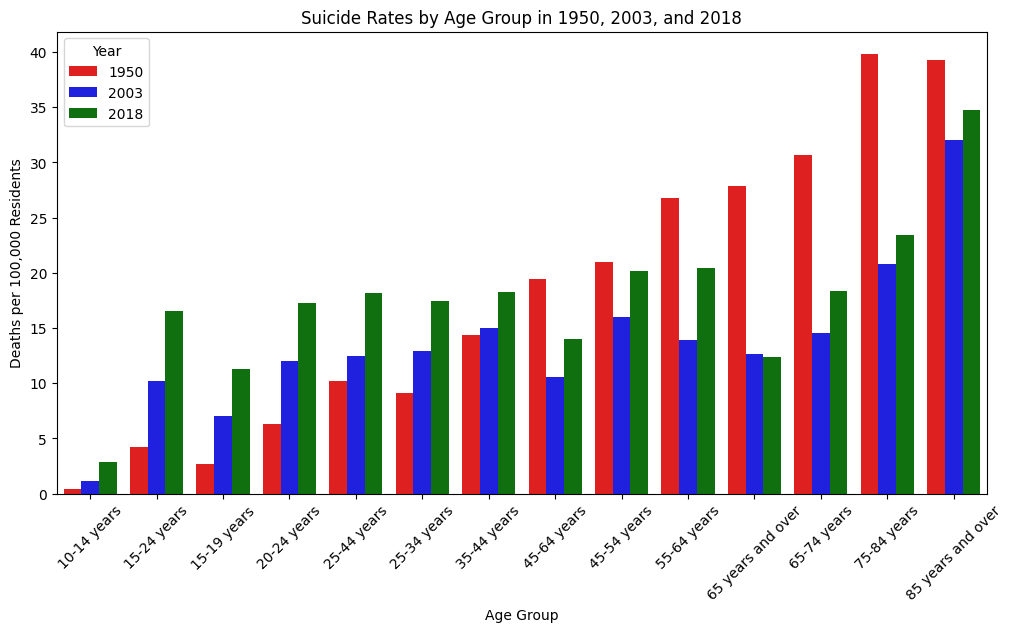

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for only 1950, 2003, and 2018, excluding "All ages"
df_filtered = df[(df['YEAR'].isin([1950, 2003, 2018])) & (df['AGE'] != 'All ages')]

# Define custom colors matching previous chart (Red for peak, Blue for lowest, Green for 2018 uptick)
custom_palette = {1950: 'red', 2003: 'blue', 2018: 'green'}

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='AGE', y='ESTIMATE', hue='YEAR', palette=custom_palette, errorbar=None)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Titles and labels
plt.title('Suicide Rates by Age Group in 1950, 2003, and 2018')
plt.xlabel('Age Group')
plt.ylabel('Deaths per 100,000 Residents')
plt.legend(title='Year')

# Show the plot
plt.show()

Suicide Rates by Gender

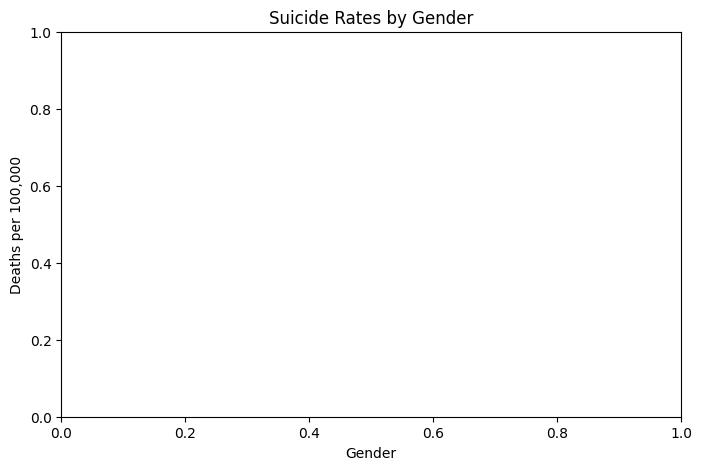

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=df[df['STUB_NAME'].isin(['Male', 'Female'])], x='STUB_NAME', y='ESTIMATE', errorbar=None)
plt.title('Suicide Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Deaths per 100,000')
plt.show()

Sucicide Rates By Race & Ethnicity